In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py 
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import tree 
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import json

In [14]:
df = pd.read_csv('datasets/EDA.csv')
df = df.iloc[: , 1:]
df.head()

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_country,product_id,product_title,partner_id,user_id,day,day_time,day_time_category,tree_encode,category_encode
0,0.0,117.030507,321366.648611,2020-08-04 04:07:56,439.389006,85.491137,0,0,0,0,...,0,0,0,0,0,2020-08-04,04:07:56,4,6,0
1,0.0,117.030507,321366.648611,2020-08-04 01:47:40,439.389006,85.491137,0,0,0,0,...,0,1,0,0,1,2020-08-04,01:47:40,1,6,0
2,0.0,117.030507,321366.648611,2020-08-04 16:54:31,439.389006,85.491137,1,1,0,1,...,1,2,1,1,2,2020-08-04,16:54:31,16,12,3
3,0.0,117.030507,321366.648611,2020-08-03 20:34:28,439.389006,85.491137,0,2,0,0,...,0,3,0,0,3,2020-08-03,20:34:28,20,6,0
4,0.0,117.030507,321366.648611,2020-08-03 20:54:17,439.389006,85.491137,1,0,0,2,...,2,4,2,2,4,2020-08-03,20:54:17,20,18,15


In [15]:
df.columns

Index(['Sale', 'SalesAmountInEuro', 'time_delay_for_conversion',
       'click_timestamp', 'nb_clicks_1week', 'product_price',
       'product_age_group', 'device_type', 'audience_id', 'product_gender',
       'product_brand', 'product_category(1)', 'product_category(2)',
       'product_category(3)', 'product_category(4)', 'product_category(5)',
       'product_category(6)', 'product_country', 'product_id', 'product_title',
       'partner_id', 'user_id', 'day', 'day_time', 'day_time_category',
       'tree_encode', 'category_encode'],
      dtype='object')

In [17]:
df = df.drop(columns = ["SalesAmountInEuro","time_delay_for_conversion","click_timestamp","day","day_time"])
df.head()

,Sale,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),...,product_category(5),product_category(6),product_country,product_id,product_title,partner_id,user_id,day_time_category,tree_encode,category_encode
0,0.0,439.389006,85.491137,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,6,0
1,0.0,439.389006,85.491137,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,6,0
2,0.0,439.389006,85.491137,1,1,0,1,1,1,1,...,0,0,1,2,1,1,2,16,12,3
3,0.0,439.389006,85.491137,0,2,0,0,0,0,0,...,0,0,0,3,0,0,3,20,6,0
4,0.0,439.389006,85.491137,1,0,0,2,2,2,2,...,0,0,2,4,2,2,4,20,18,15


<AxesSubplot:>

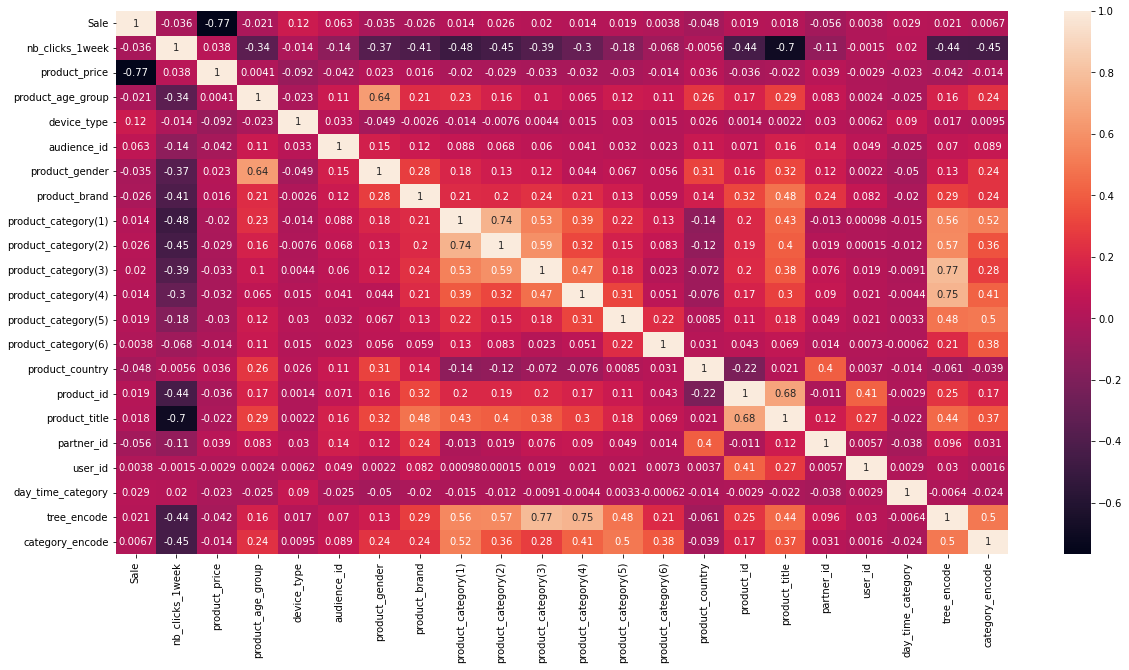

In [19]:
#df1 = df.drop(columns = ['audience_id',"SalesAmountInEuro","time_delay_for_conversion",'product_id',"product_brand", 'product_title', 'partner_id', 'user_id'])
df1 = df.astype(int)
fig = plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)

In [20]:
def visualize_result(y_true,y_pred):
  cm = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cm, range(2), range(2))
  plt.figure(figsize=(10,7))
  sn.set(font_scale=1) 
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 20},fmt="d",cmap="YlGnBu") # font size
  from sklearn.metrics import classification_report
  from sklearn.metrics import f1_score,recall_score,precision_score
  target_names = ['class 0', 'class 1']
  print("f1_score "+" is :{}%".format(f1_score(y_true=y_true , y_pred= y_pred)))
  print("recall_score "+" is :{}%".format(recall_score(y_true=y_true , y_pred= y_pred)))
  print("precision_score "+" is :{}%".format(precision_score(y_true=y_true , y_pred= y_pred)))
  print(classification_report(y_true, y_pred, target_names=target_names))

In [21]:
X = df1.drop(columns = ["Sale"])
y = df1["Sale"]
from sklearn.utils import shuffle
for i in range(20):
    X, y = shuffle(X, y, random_state=i)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

f1_score  is :0.6069292123629112%
recall_score  is :0.4406442272891784%
precision_score  is :0.9747798238590872%
              precision    recall  f1-score   support

     class 0       0.92      1.00      0.96     34474
     class 1       0.97      0.44      0.61      5526

    accuracy                           0.92     40000
   macro avg       0.95      0.72      0.78     40000
weighted avg       0.93      0.92      0.91     40000



/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



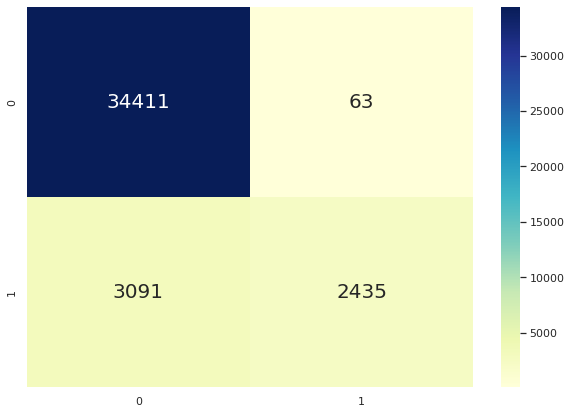

In [22]:
clf = LogisticRegression(solver='lbfgs', max_iter=500)
clf = clf.fit(X_train, y_train)
visualize_result(y_test,clf.predict(X_test))

f1_score  is :0.8196476241324079%
recall_score  is :0.6945349258052841%
precision_score  is :0.9997395154988278%
              precision    recall  f1-score   support

     class 0       0.95      1.00      0.98     34474
     class 1       1.00      0.69      0.82      5526

    accuracy                           0.96     40000
   macro avg       0.98      0.85      0.90     40000
weighted avg       0.96      0.96      0.95     40000



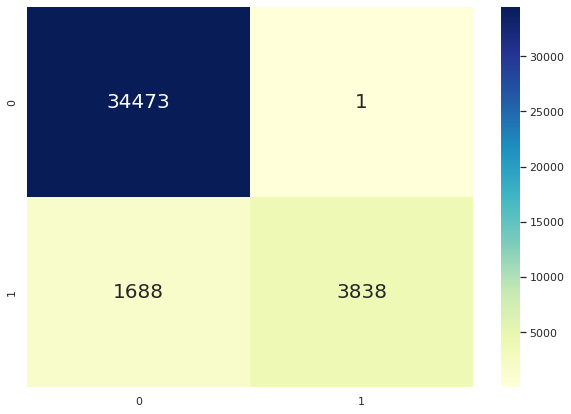

In [23]:
clf = DecisionTreeClassifier(random_state=2,max_depth =5)
clf = clf.fit(X_train, y_train)
visualize_result(y_test,clf.predict(X_test))

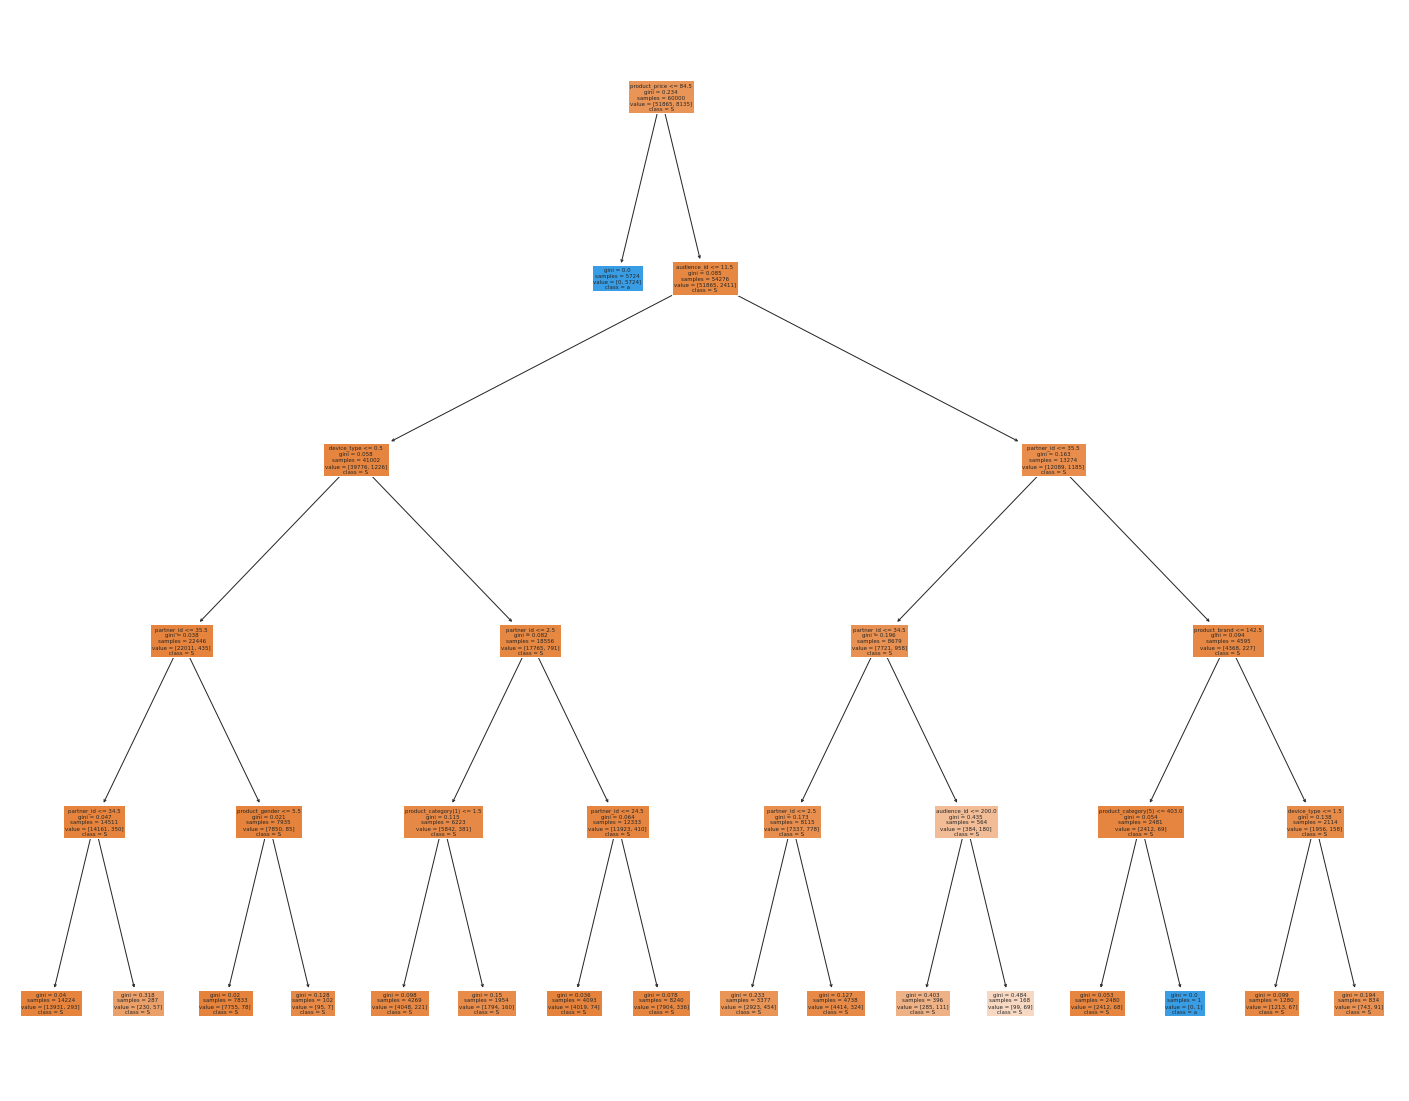

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names="Sale",
                   filled=True)


f1_score  is :0.8197351559162751%
recall_score  is :0.6945349258052841%
precision_score  is :1.0%
              precision    recall  f1-score   support

     class 0       0.95      1.00      0.98     34474
     class 1       1.00      0.69      0.82      5526

    accuracy                           0.96     40000
   macro avg       0.98      0.85      0.90     40000
weighted avg       0.96      0.96      0.95     40000



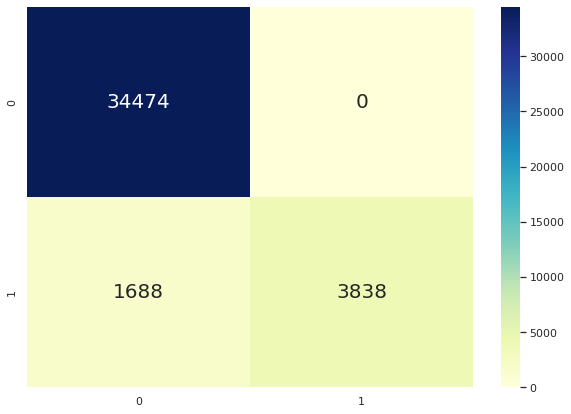

In [25]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)
visualize_result(y_test,clf.predict(X_test))

f1_score  is :0.8197351559162751%
recall_score  is :0.6945349258052841%
precision_score  is :1.0%
              precision    recall  f1-score   support

     class 0       0.95      1.00      0.98     34474
     class 1       1.00      0.69      0.82      5526

    accuracy                           0.96     40000
   macro avg       0.98      0.85      0.90     40000
weighted avg       0.96      0.96      0.95     40000



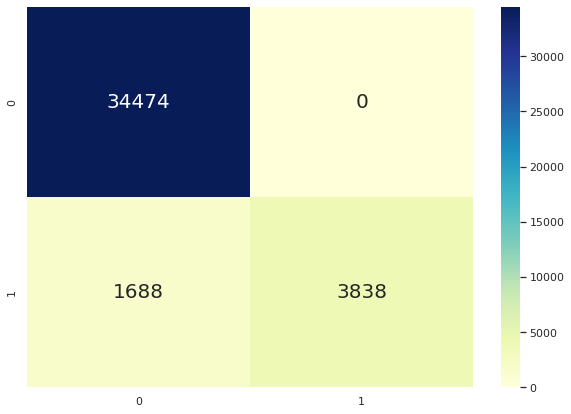

In [26]:
clf = AdaBoostClassifier(n_estimators=80, random_state=2)
clf = clf.fit(X_train, y_train)
visualize_result(y_test,clf.predict(X_test))
from sklearn.ensemble import AdaBoostClassifier

In [38]:
from sklearn.naive_bayes import GaussianNB
X = df.drop(['Sale','product_id'
,'product_title','user_id',"product_price"],axis=1)
y = df.Sale.values
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

f1_score  is :0.19951235025972647%
recall_score  is :0.17297794117647058%
precision_score  is :0.23566240921612822%
              precision    recall  f1-score   support

     class 0       0.88      0.91      0.89     34560
     class 1       0.24      0.17      0.20      5440

    accuracy                           0.81     40000
   macro avg       0.56      0.54      0.55     40000
weighted avg       0.79      0.81      0.80     40000



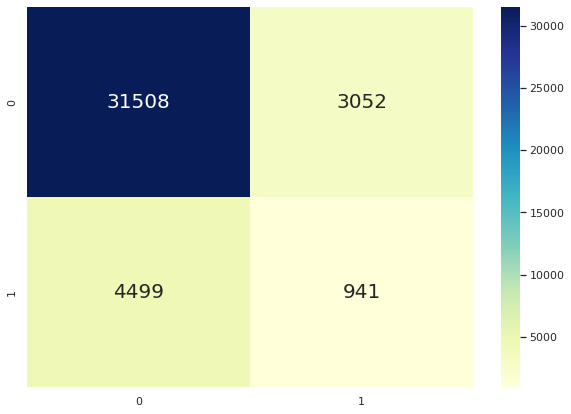

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,recall_score, precision_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier()
rf.fit(X_train, y_train)
visualize_result(y_test,rf.predict(X_test))